In [49]:
 import os
import datetime as dt

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [51]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15,5)


In [52]:
base_path = os.path.dirname(os.path.abspath('../..'))
data_path = os.path.join(base_path, 'data')
stock_path = os.path.join(data_path, 'stock')
code_path = os.path.join(base_path, 'code')
result_path = os.path.join(base_path, 'result')
pm_path = os.path.join(result_path, '2.미세먼지')

In [53]:
codes = ['187790', '044340', '045520', '009450']

In [54]:
codes

['187790', '044340', '045520', '009450']

# 1. Data

In [55]:
name_dict = {}
for code in codes:
    name_dict[code]= None

name_dict['187790'] = '나노'
name_dict['044340'] = '위닉스'
name_dict['045520'] = '크린앤사이언스'
name_dict['009450'] = '경동나비엔'

In [56]:
data = {}
for code in codes:
    if '.' in code or code == '121800':
        continue
    code_path = os.path.join(codes_path, code)
    files = os.listdir(code_path)
    data[code.split('.')[0]] = {}
    
    for file in files:
        file_path = os.path.join(code_path, file)
        df = pd.read_csv(file_path, engine='python')
        df['기준가'] = df.iloc[0]['체결가'] - df.iloc[0]['전일비']
        df['기준가비교'] = df['체결가'] - df['기준가']
        df['기준가비율'] = df['기준가비교'] / df['기준가']
        df['체결시각'] = pd.to_datetime(df['체결시각'])
        df['이전체결가'] = df['체결가'].shift(1)
        df['체결가-이전체결가'] = df['체결가'] - df['이전체결가']
        df['7분이동평균'] = df['체결가'].rolling(window=7).mean()
        df['7분-이전이동평균'] = df['7분이동평균'] - df['7분이동평균'].shift(1)
        df.set_index('체결시각', inplace=True)
        data[code.split('.')[0]][file.split('.')[0]] = df.copy()

# 2. Strategy

# 전략1

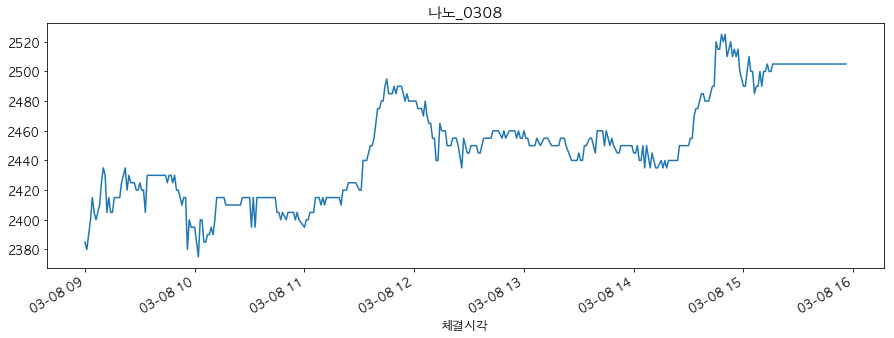

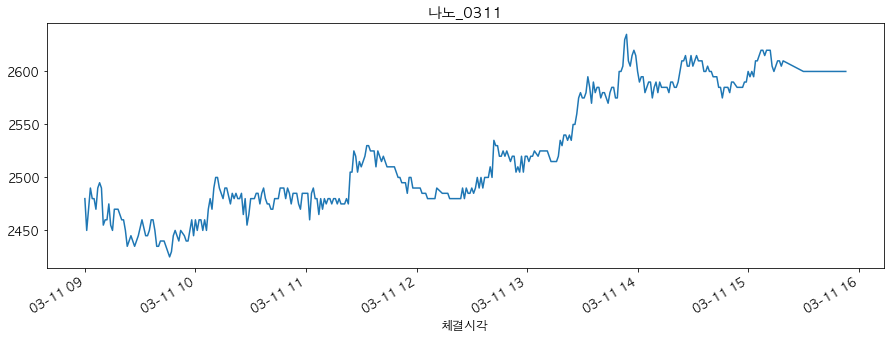

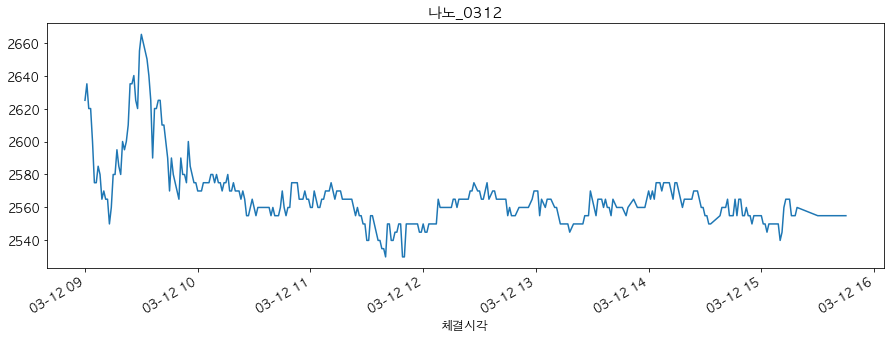

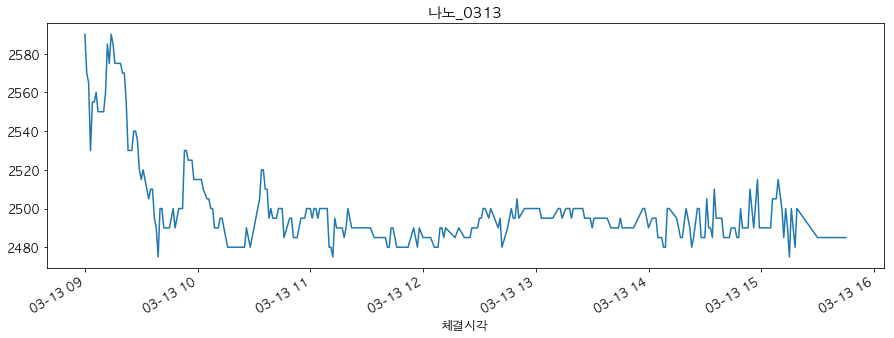

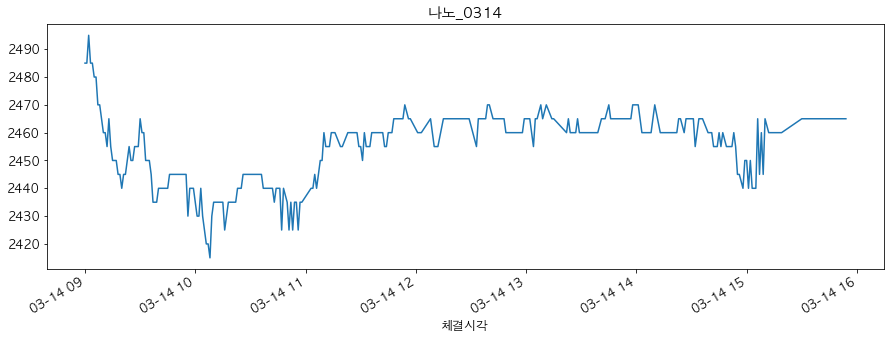

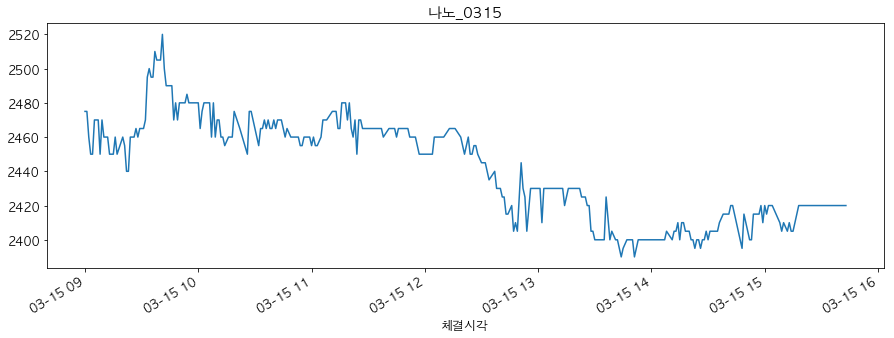

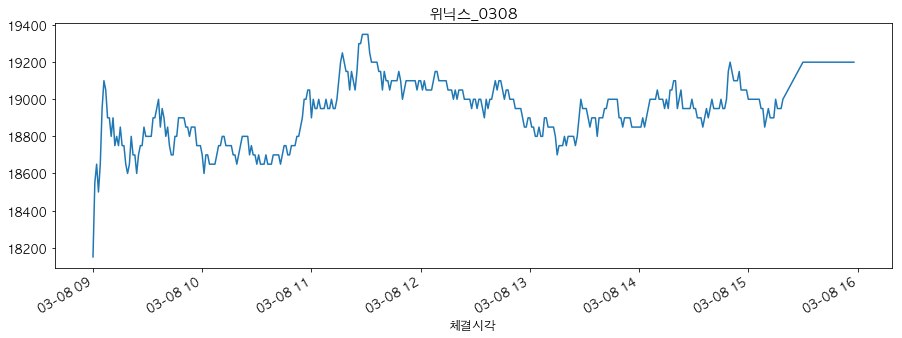

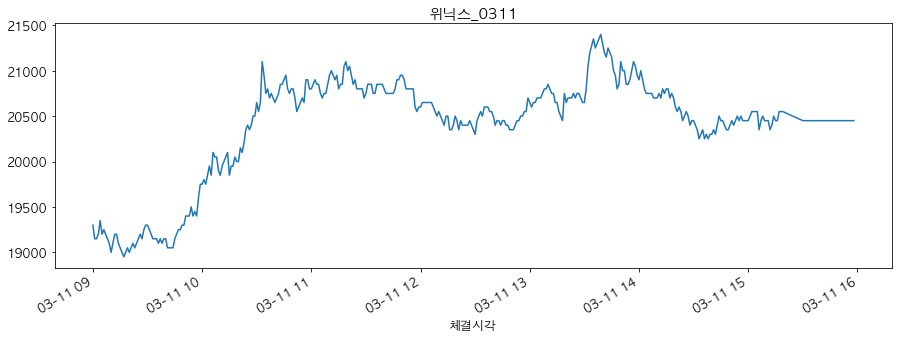

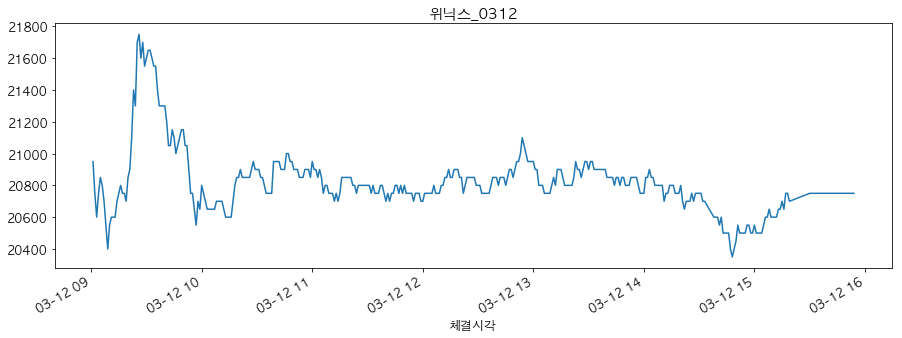

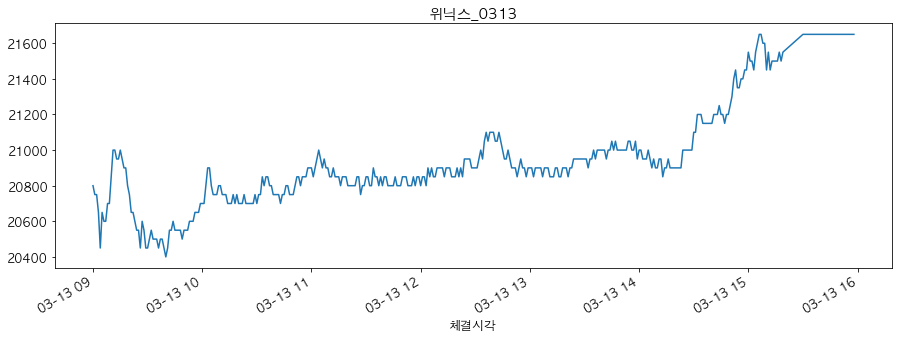

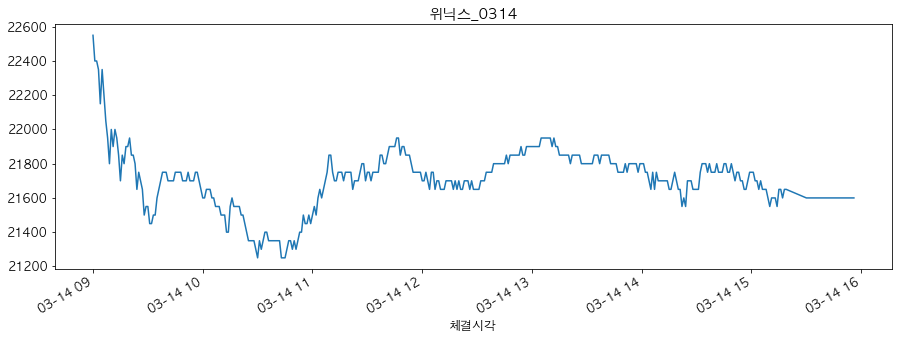

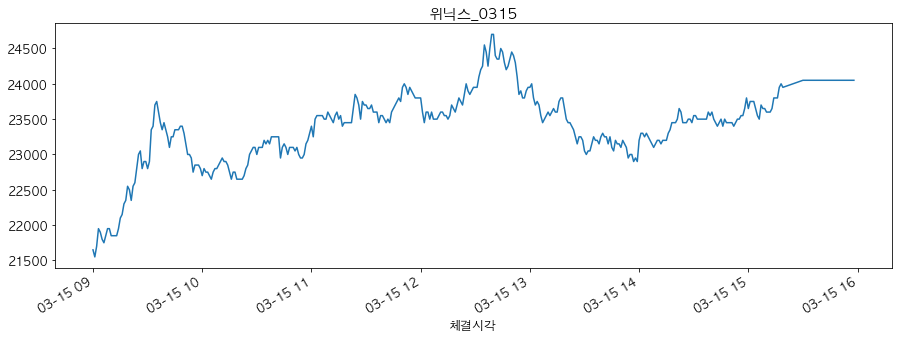

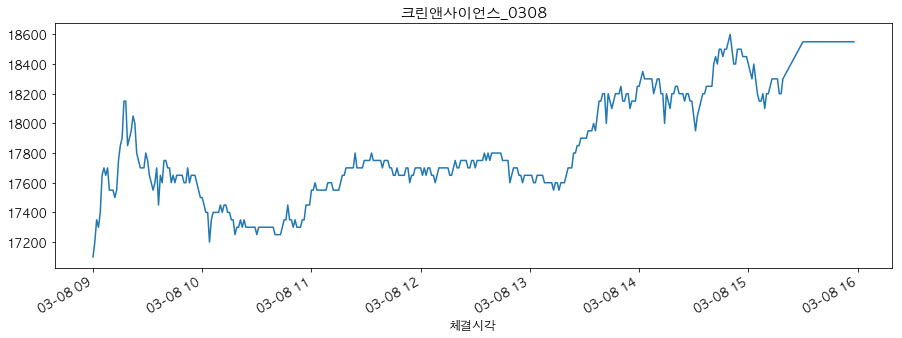

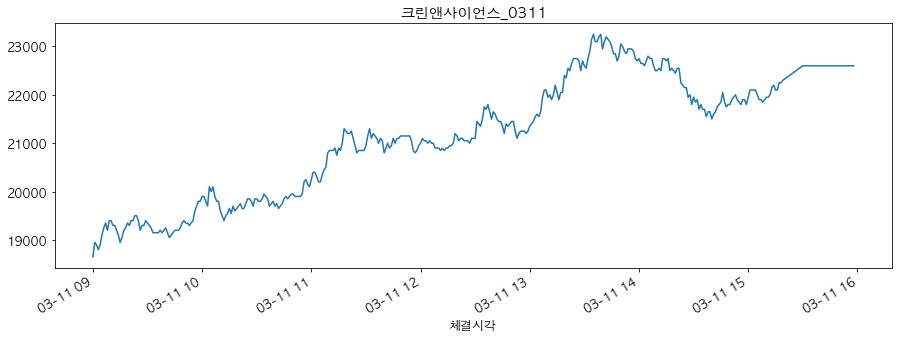

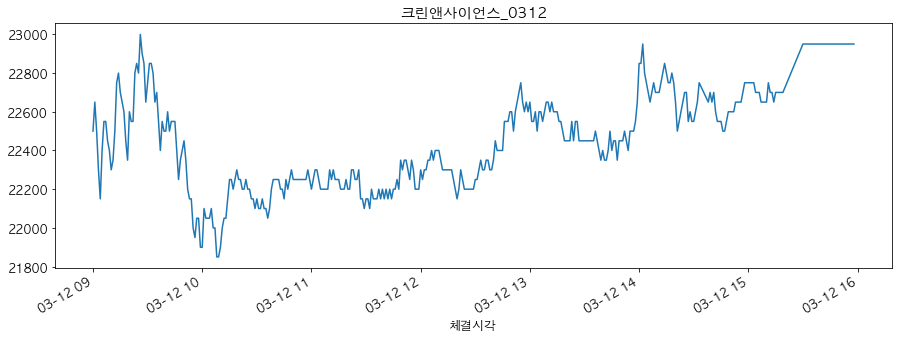

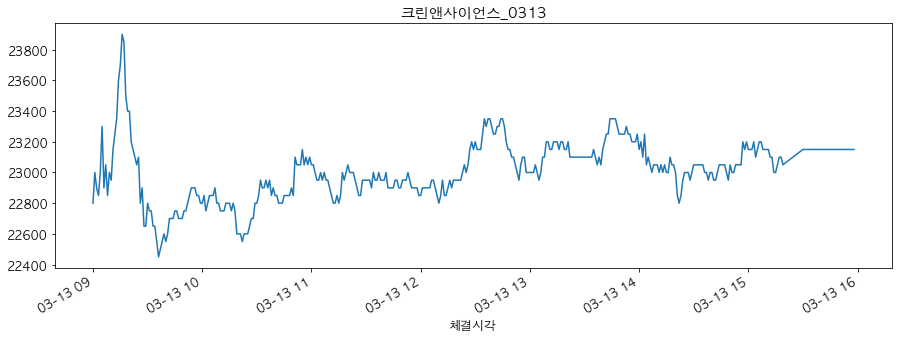

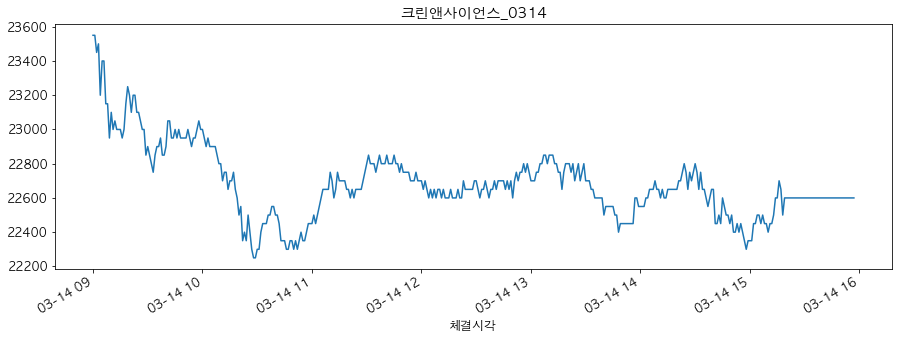

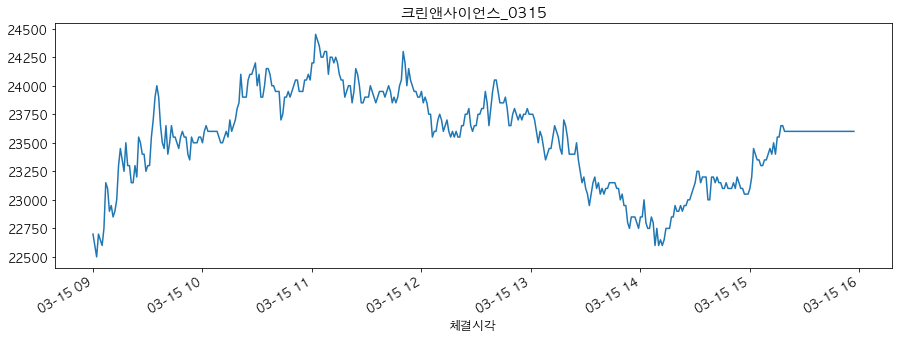

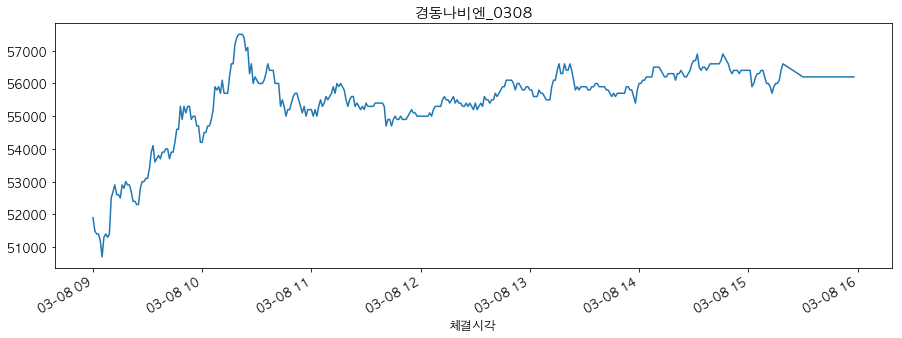

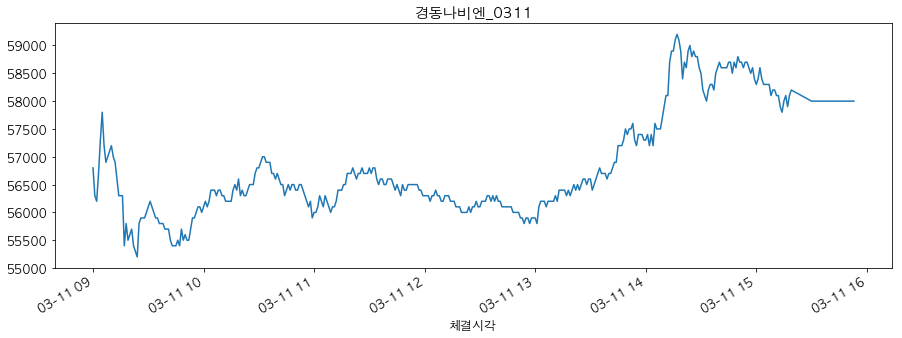

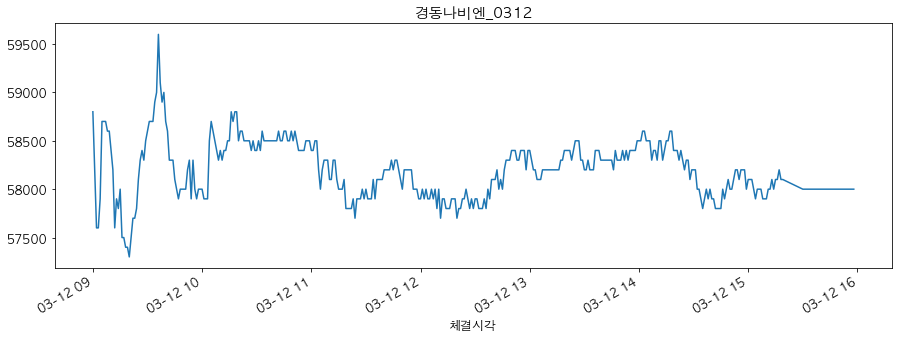

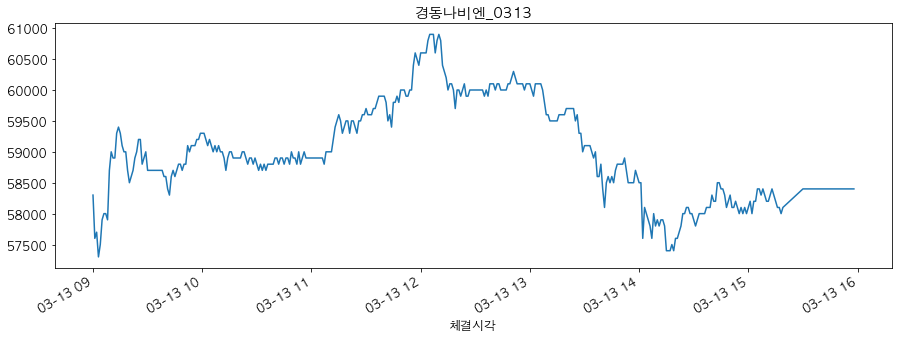

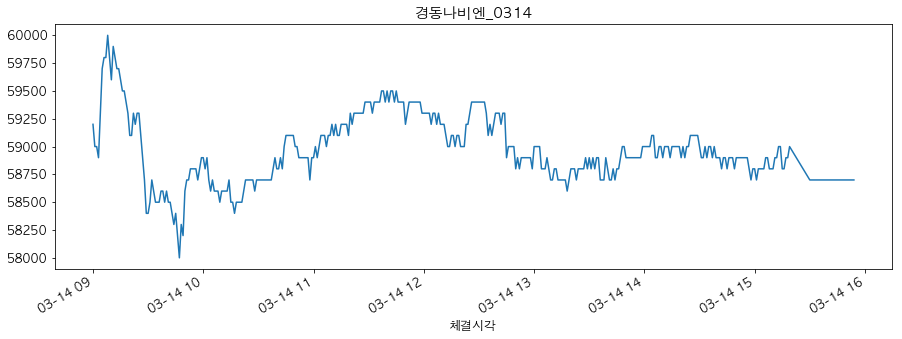

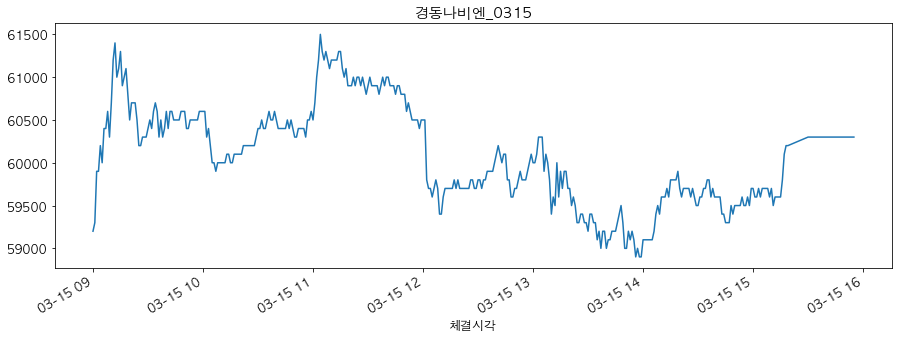

In [58]:
# 2. 전략 1 - 시작 가격
from time import sleep
from matplotlib.dates import HourLocator, DateFormatter, MinuteLocator

pd.options.display.float_format = '{:,.2f}'.format

days = ['0308', '0311', '0312', '0313', '0314', '0315']
days_index = ['03-08', '03-11', '03-12', '03-13', '03-14', '03-15']

for code in codes:
    code_path = os.path.join(pm_path, "190317_" + code)
    
    if not os.path.exists(code_path):
        os.makedirs(code_path)
        
    maximum = 0
    minimum = 1000000
    for i, day in enumerate(days):
        num_max = np.max(data[code][day]['체결가'])
        maximum = np.maximum(num_max, maximum)
        num_min = np.min(data[code][day]['체결가'])
        minimum = np.minimum(num_min, minimum)
        
    for i, day in enumerate(days):
        start_time = pd.to_datetime('2019-'+days_index[i]+' 09:00:00')
        end_time = pd.to_datetime('2019-'+days_index[i]+ ' 16:30:00')
        ax = data[code][day]['체결가'][start_time: end_time].plot()
        #ax.xaxis.set_major_locator(MinuteLocator(interval=5))
        #ax.xaxis.set_major_formatter(DateFormatter('%M'))
        plt.title(name_dict[code] + "_" + day)
        #plt.ylim([minimum, maximum])
        plt.savefig(os.path.join(code_path, "0317" + "_" + name_dict[code] + "_" + day + "체결가.png"))
        plt.show()
        
        del ax
        sleep(0.5)